In [2]:
import numpy as np
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.drop(['RowNumber','CustomerId','Surname'], inplace = True, axis =1)

In [15]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
df=pd.get_dummies(df,columns = ['Geography','Gender'],drop_first=True).astype(int)

In [18]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [20]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11]]

In [26]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,1
9997,709,36,7,0,1,0,1,42085,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,0,1


In [27]:
y = df.iloc[:,[8]]

In [28]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [33]:
X_train_scale

array([[ 1.67588802, -0.94183739,  0.00934296, ...,  1.74875572,
        -0.57987798, -1.10022343],
       [ 0.30320673, -0.17987213,  1.04687659, ...,  1.74875572,
        -0.57987798,  0.9089063 ],
       [-0.10235819,  0.96307575, -0.33650158, ...,  1.74875572,
        -0.57987798,  0.9089063 ],
       ...,
       [ 0.86475817, -0.08462648, -1.37403521, ..., -0.57183516,
        -0.57987798, -1.10022343],
       [ 0.15761932,  0.39160181,  1.04687659, ..., -0.57183516,
        -0.57987798,  0.9089063 ],
       [ 0.46959234,  1.15356706, -1.37403521, ...,  1.74875572,
        -0.57987798,  0.9089063 ]])

In [34]:
X_test_scale

array([[-0.58071682, -0.65610042, -0.68234612, ...,  1.74875572,
        -0.57987798,  0.9089063 ],
       [-0.29994111,  0.39160181, -1.37403521, ..., -0.57183516,
        -0.57987798,  0.9089063 ],
       [-0.52872132,  0.48684746, -0.33650158, ..., -0.57183516,
         1.72450072, -1.10022343],
       ...,
       [-0.65351053, -0.75134608,  1.73856568, ..., -0.57183516,
        -0.57987798, -1.10022343],
       [-2.22377473,  2.01077798,  0.70103205, ..., -0.57183516,
        -0.57987798,  0.9089063 ],
       [ 0.55278515,  0.67733878, -0.33650158, ...,  1.74875572,
        -0.57987798, -1.10022343]])

In [37]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [82]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(1,activation='sigmoid'))

In [83]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
##complile model
model.compile(loss='binary_crossentropy', optimizer = 'Adam',metrics=['accuracy'])

In [95]:
history = model.fit(X_train_scale,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3068 - val_accuracy: 0.8545 - val_loss: 0.3595
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3020 - val_accuracy: 0.8537 - val_loss: 0.3579
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8712 - loss: 0.3066 - val_accuracy: 0.8567 - val_loss: 0.3592
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8791 - loss: 0.3016 - val_accuracy: 0.8612 - val_loss: 0.3569
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8719 - loss: 0.3064 - val_accuracy: 0.8575 - val_loss: 0.3580
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8732 - loss: 0.3076 - val_accuracy: 0.8619 - val_loss: 0.3585
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8845 - loss: 0.2932 - val_accuracy: 0.8552 - val_loss: 0.3587
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8780 - loss: 0.3019 - val_ac

In [96]:
model.layers[0].get_weights()

[array([[-0.3958223 , -0.42606407,  0.1665485 , -0.13699874,  0.08748179,
          0.09158859,  0.09676439,  0.07673046,  0.25083974,  0.34945318,
         -0.15624481],
        [-0.2049902 , -0.18507569, -0.81596166, -0.5726288 ,  0.7925468 ,
         -1.0098538 , -0.7798819 , -0.34174627, -0.6364991 , -0.3120395 ,
         -1.2158021 ],
        [ 0.26211   , -0.33848056,  0.05193539,  0.11220859,  0.11422968,
          0.20374933, -0.06182167, -0.59146273,  0.08018892,  0.14365129,
         -0.01192014],
        [-0.7293163 ,  0.56130743,  1.0432485 ,  1.5075449 ,  0.06619326,
          0.04110319, -1.1976168 ,  0.35050532,  0.94384956, -0.3272484 ,
          0.09773123],
        [ 1.8617934 ,  0.79334146, -0.2988547 ,  0.33773267,  0.43122852,
         -0.06025253,  0.2722428 ,  0.22850767,  1.3539379 , -0.9500873 ,
          0.48625168],
        [-0.18096519,  0.19810387,  0.4527743 ,  0.16460764,  0.05336431,
         -0.09273113,  0.05105658, -0.42746365, -0.17785849, -0.3323751

In [97]:
predict = model.predict(X_test_scale)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


In [98]:
##deciding probabilities
test_predict = np.where(predict>0.5,1,0)

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(test_predict,y_test)

0.8636363636363636

In [101]:
history.history

{'accuracy': [0.8735074400901794,
  0.8727611899375916,
  0.8742537498474121,
  0.875,
  0.871268630027771,
  0.8731343150138855,
  0.875373125076294,
  0.8736940026283264,
  0.8725746273994446,
  0.8736940026283264,
  0.875373125076294,
  0.8736940026283264,
  0.875186562538147,
  0.8740671873092651,
  0.8744403123855591,
  0.8759328126907349,
  0.8742537498474121,
  0.8720149397850037,
  0.874813437461853,
  0.8740671873092651,
  0.8757462501525879,
  0.8744403123855591,
  0.874813437461853,
  0.8742537498474121,
  0.874626874923706,
  0.8761193752288818,
  0.8736940026283264,
  0.8744403123855591,
  0.8722015023231506,
  0.8725746273994446,
  0.875186562538147,
  0.8755596876144409,
  0.8727611899375916,
  0.874813437461853,
  0.8720149397850037,
  0.8733208775520325,
  0.8731343150138855,
  0.8757462501525879,
  0.8716418147087097,
  0.8744403123855591,
  0.8742537498474121,
  0.8733208775520325,
  0.8733208775520325,
  0.8742537498474121,
  0.8740671873092651,
  0.8735074400901794

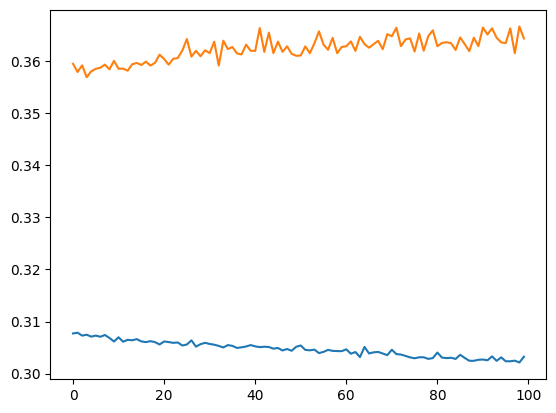

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

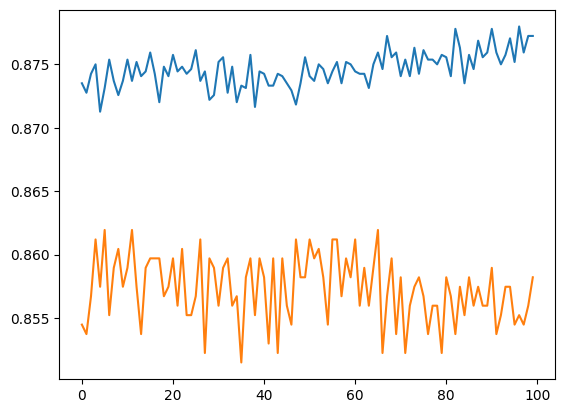

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### There is a bit overfitting

### 